In [1]:
%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

DATA_PATH = 'data/coinmarketcap/'
data_df = pd.read_pickle(DATA_PATH + 'bitcoin.pkl')
data_df_ltc = pd.read_pickle(DATA_PATH + 'litecoin.pkl')
data_df_cap = pd.read_pickle(DATA_PATH + 'marketcap-total.pkl')

#BITCOIN
         market_cap      price_btc      price_usd          time    volume_usd
count  5.081740e+05  508174.000000  508174.000000  5.081740e+05  5.081740e+05
mean   2.585609e+10       1.001950    1599.305750  1.444327e+12  9.564257e+08
std    5.229410e+10       0.802731    3100.558548  4.444306e+10  2.946748e+09
min    7.452976e+08       0.999969      65.526000  1.367190e+12  0.000000e+00
25%    3.940043e+09       1.000000     277.059000  1.405978e+12  1.648310e+07
50%    6.934899e+09       1.000000     493.925000  1.444604e+12  4.366060e+07
75%    1.364601e+10       1.000000     907.009000  1.482804e+12  1.395068e+08
max    3.364340e+11     333.427000   20089.000000  1.520809e+12  1.032180e+11
            market_cap  price_btc  price_usd      time  volume_usd
market_cap    1.000000  -0.000770   0.999871  0.591729    0.934438
price_btc    -0.000770   1.000000  -0.000794  0.001461   -0.000735
price_usd     0.999871  -0.000794   1.000000  0.585940    0.933969
time          0.59172

<IPython.core.display.Javascript object>


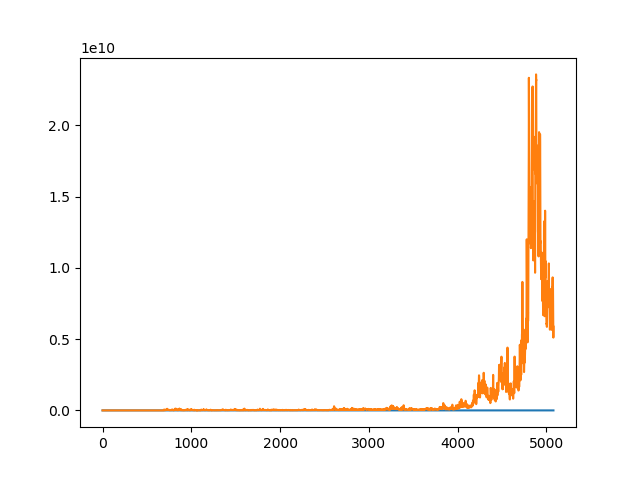

In [2]:
print("#BITCOIN")
print(data_df.describe())
print(data_df.corr())

print("#LITECOIN")
print(data_df_ltc.describe())
print(data_df_ltc.corr())

print("#MARKETCAP")
print(data_df_cap.describe())
print(data_df_cap.corr())

price_usd = data_df['price_usd'][0::100]
market_cap = data_df['market_cap'][0::100]
volume = data_df['volume_usd'][0::100]

fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(range(len(price_usd)), price_usd, label='Cena USD')
axes.plot(range(len(volume)), volume, label='Volume')
fig.show()

#plt.plot(range(len(price_usd)), price_usd, label='Cena USD')
#plt.plot(range(len(market_cap)), market_cap, label='Market Cap')
#plt.plot(range(len(volume)), volume, label='Volume')
#plt.legend()
#plt.show()

<IPython.core.display.Javascript object>


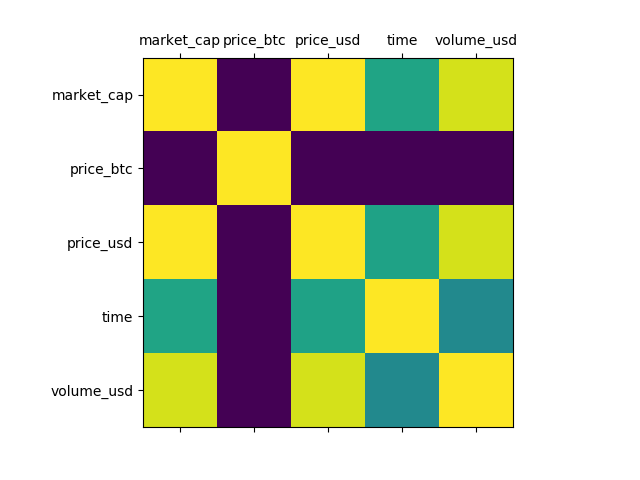

<IPython.core.display.Javascript object>


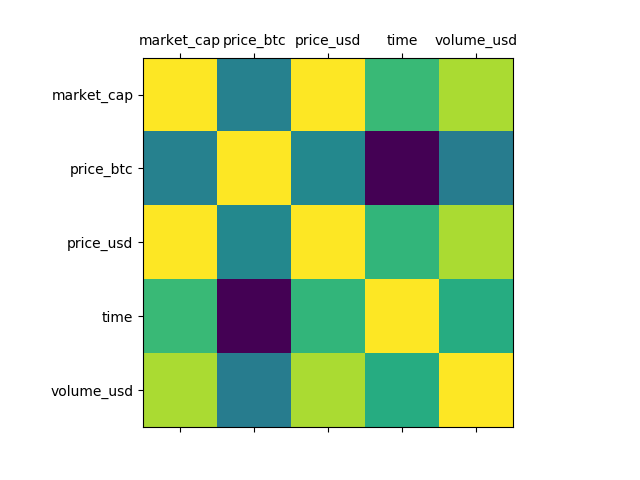

In [3]:
def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots()
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
plot_corr(data_df)
plot_corr(data_df_ltc)
#plt.matshow(data_df.corr())

In [78]:
#outliers = [x for x in data_df if x['price_btc'] > 1]
#print(data_df.query('price_btc!=1'))
#print(data_df.duplicated(keep=False))

In [5]:
#helper functions
def print_time(msg, unix):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

procent_change_btc = data_df['price_usd'].pct_change()[1:-1]
procent_change_ltc = data_df_ltc['price_usd'].pct_change()[1:-1]

btc = data_df['time_readable'].tolist()[20112]
ltc = data_df_ltc['time_readable'].tolist()[20112]
print(btc, ltc)

idx = 322355

btc_time = data_df['time'].tolist()
print_time('',btc_time[idx]/1000)
btc_time = [math.floor(((x/1000)/300))*300 for x in btc_time]
print_time('',btc_time[idx])

Mon Jul  8 05:01:02 2013 Mon Jul  8 06:46:01 2013
 Sun Jun  5 21:49:22 2016
 Sun Jun  5 21:45:00 2016


In [6]:
## combine these different collections into a list    
data_to_plot = [procent_change_btc, procent_change_ltc]

# Create a figure instance
fig = plt.figure(1)

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)


c:\users\deyan\tf-workspace\env\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\deyan\tf-workspace\env\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [4]:
for i in range(10):
    print('nedicu')

nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
